In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [22]:
df = pd.read_csv("../data/processed/stocks-COMBINED-Jan2020-Dec2024.csv")

float_columns = df.select_dtypes(include=['float64']).columns
df_float = df[float_columns]

df_float.replace([np.inf, -np.inf], np.nan, inplace=True)
df_float.fillna(df_float.mean(), inplace=True)

/var/folders/fc/n6ycqzwx13989g40ry2djdsh0000gn/T/ipykernel_44739/3149537304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_float.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/fc/n6ycqzwx13989g40ry2djdsh0000gn/T/ipykernel_44739/3149537304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_float.fillna(df_float.mean(), inplace=True)


In [23]:
df_float = df_float.drop(['Open', 'High', 'Low'], axis=1)

In [24]:
df_float.head()

,Price,Vol.,Change %,EPS,Price_Return,Log_Return,Volatility,Moving_Average,RSI,MACD,Sharpe_Ratio,Max_Drawdown
0,141.86,39030000.0,-0.0153,0.7,0.008173,0.008140,0.020197,143.830,411.212815,0.728616,-0.010539,-0.000235
1,144.07,44390000.0,-0.0305,0.7,0.015579,0.015459,0.018745,142.680,310.200927,0.792438,-0.010539,-0.000235
2,148.60,87700000.0,-0.1062,0.7,0.031443,0.030959,0.019660,143.380,247.665581,1.194777,-0.010539,-0.000235
3,166.25,71900000.0,0.0396,0.7,0.118775,0.112235,0.032259,148.298,148.096633,2.904362,-0.010539,-0.000235
4,159.92,36010000.0,0.0236,0.7,-0.038075,-0.038819,0.033763,152.140,161.710631,3.705724,-0.010539,-0.000235


In [25]:
X = df_float.drop(['Price'], axis=1).values
y  = df_float['Price'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## Define Feedforward Neural Network Model


## Train the model


In [45]:
mae_results = {}
for epoch in range(100, 1001, 50):
    print(f"Training model with {epoch} epochs")
    
    model = Sequential([
        Dense(64, activation='relu', input_shape=[X_train.shape[1],]),
        Dropout(0.3), # randomly set 30% of neurons to 0 during training to prevent overfitting
        Dense(32, activation='relu'), # 2nd layer with only 32 neurons to reduce model complexity
        Dense(1, activation='linear') # single out representing the Price
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics='mae')
    # adam -> adaptive gradient based optimizer (type of gradient descent): AdaGrad & RMSProp       


    model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epoch,
                    batch_size=32
                    )
    
    predictions = model.predict(X_test).flatten()
    
    mae = mean_absolute_error(y_test, predictions)
    mae_results[epoch] = mae
    print(f"Epochs: {epoch} | MAE: {mae}")

Training model with 100 epochs
Epoch 1/100
122/122 [==============================] - 0s 1ms/step - loss: 67328.5547 - mae: 224.9558 - val_loss: 56539.7891 - val_mae: 205.9457
Epoch 2/100
122/122 [==============================] - 0s 606us/step - loss: 32324.3379 - mae: 150.6947 - val_loss: 8974.3887 - val_mae: 79.8327
Epoch 3/100
122/122 [==============================] - 0s 715us/step - loss: 5556.7529 - mae: 57.8313 - val_loss: 3126.1799 - val_mae: 42.3481
Epoch 4/100
122/122 [==============================] - 0s 622us/step - loss: 3168.7871 - mae: 42.5325 - val_loss: 2055.1318 - val_mae: 33.7816
Epoch 5/100
122/122 [==============================] - 0s 603us/step - loss: 2448.5405 - mae: 37.5585 - val_loss: 1601.3794 - val_mae: 29.8976
Epoch 6/100
122/122 [==============================] - 0s 557us/step - loss: 2102.8127 - mae: 34.6340 - val_loss: 1387.3743 - val_mae: 27.8549
Epoch 7/100
122/122 [==============================] - 0s 554us/step - loss: 1969.9646 - mae: 33.6601 - val

## Model Evaluation


In [46]:
mae_results

{100: 3.7399122877854563,
 150: 3.673137145996094,
 200: 3.5558574425330525,
 250: 4.3641277916541465,
 300: 4.341572904146635,
 350: 3.674060824506711,
 400: 9.223212161646135,
 450: 11.699360898844402,
 500: 4.194033297181741,
 550: 4.009001143391926,
 600: 3.8716499240973046,
 650: 4.038987292010968,
 700: 8.05191028129382,
 750: 4.2953251377203525,
 800: 4.485844051889273,
 850: 4.4830111594175674,
 900: 4.284747272354518,
 950: 4.666406692270132,
 1000: 17.59313472290039}

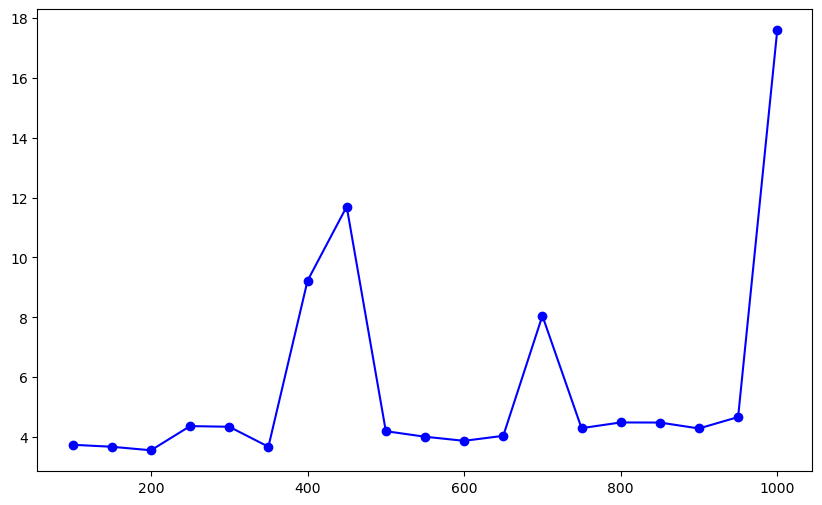

In [48]:
epochs = list(mae_results.keys())
mae_values = list(mae_results.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae_values, marker='o', linestyle='-', color='blue', label='MAE')

In [30]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


31/31 [==============================] - 0s 454us/step - loss: 24.4421 - mae: 3.3766
Test Loss: 24.442119598388672, Test MAE: 3.376631021499634


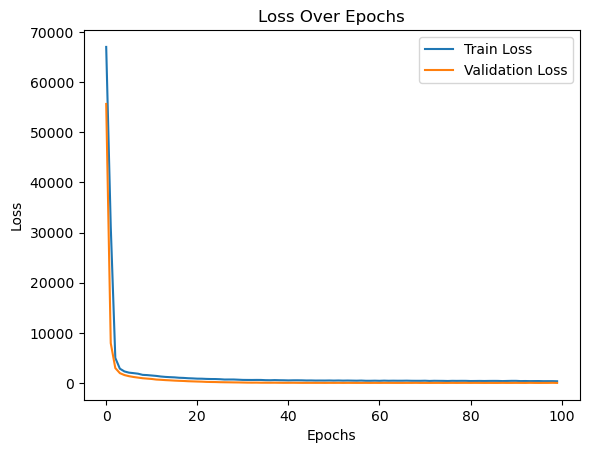

In [31]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
predictions = model.predict(X_test)

31/31 [==============================] - 0s 391us/step


array([[ 53.16598 ],
       [165.90982 ],
       [234.89175 ],
       [186.91599 ],
       [200.98889 ],
       [327.57306 ],
       [124.425934],
       [310.511   ],
       [232.30785 ],
       [311.1548  ],
       [219.70325 ],
       [326.35556 ],
       [360.28595 ],
       [454.15796 ],
       [149.31961 ],
       [394.00458 ],
       [232.8606  ],
       [246.82654 ],
       [468.94507 ],
       [443.3084  ],
       [222.89096 ],
       [504.56244 ],
       [469.98267 ],
       [248.65472 ],
       [ 76.61895 ],
       [214.89973 ],
       [176.9992  ],
       [ 88.414215],
       [236.2771  ],
       [ 96.0325  ],
       [149.27368 ],
       [444.11676 ],
       [204.35237 ],
       [120.032265],
       [383.1347  ],
       [205.66064 ],
       [228.03241 ],
       [265.5633  ],
       [202.01688 ],
       [ 54.16947 ],
       [207.01474 ],
       [ 93.06757 ],
       [555.56354 ],
       [ 39.60001 ],
       [213.3809  ],
       [ 89.845184],
       [149.4267  ],
       [472.5

In [39]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions.flatten()
})

comparison_df

,Actual,Predicted
0,48.78,53.165981
1,168.74,165.909821
2,246.79,234.891754
3,187.82,186.915985
4,201.62,200.988892
...,...,...
970,496.39,499.045074
971,85.95,81.657867
972,166.01,164.183258
973,207.90,212.267517


In [40]:
from sklearn.metrics import mean_absolute_error

# Calculate the residuals (errors)
comparison_df['Error'] = abs(comparison_df['Actual'] - comparison_df['Predicted'])

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 3.376630204107822


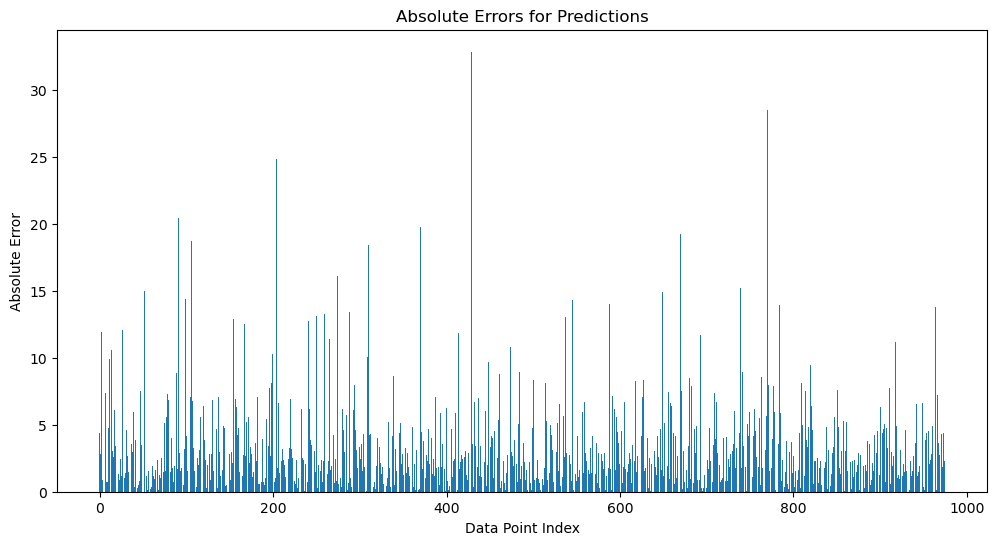

In [41]:
import matplotlib.pyplot as plt

# Plot individual absolute errors
plt.figure(figsize=(12, 6))
plt.bar(range(len(comparison_df)), comparison_df['Error'])
plt.title('Absolute Errors for Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Absolute Error')
plt.show()
